# Week 39 handin

# Handin exercise for week 5: Pandas

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs


## 02 Status

How far you got:


## 03 Exercise 1

5. With data aggregation and data visualization answer the following questions:

A) What is the change in pct of divorced danes from 2008 to 2020?

In [1]:
import pandas as pd

divorced_between_08_20 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F&Tid=2008K1%2C2020K3', sep=';')

divorced_before = divorced_between_08_20.iloc[0,2]
divorced_before_time = divorced_between_08_20.iloc[0,1]

divorced_after = divorced_between_08_20.iloc[1,2]
divorced_after_time = divorced_between_08_20.iloc[1,1]

divorced_change_proc = round(((divorced_after/divorced_before)-1)*100,2)


#print(data,"\n")
print('The divorce percentage has changed by {:.2f}% from {} - {}.'.format(divorced_change_proc, divorced_before_time, divorced_after_time))

The divorce percentage has changed by 28.41% from 2008K1 - 2020K3.


B) Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

In [2]:
import pandas as pd

never_married_2020 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U&OMR%C3%85DE=*&Tid=2020K3', sep=';')

mask_not_country = (never_married_2020[:]['OMRÅDE'] != 'Hele landet')
mask_not_region = (never_married_2020[:]['OMRÅDE'].str.contains('Region') == False)
mask_not_city = mask_not_country & mask_not_region

data_masked = never_married_2020[mask_not_city]

data_5_biggest = data_masked.sort_values('INDHOLD', ascending=False)
print(data_5_biggest[:5])


    CIVILSTAND         OMRÅDE     TID  INDHOLD
2        Ugift      København  2020K3   414218
84       Ugift         Aarhus  2020K3   208470
104      Ugift        Aalborg  2020K3   118694
58       Ugift         Odense  2020K3   112672
3        Ugift  Frederiksberg  2020K3    60802


C) Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

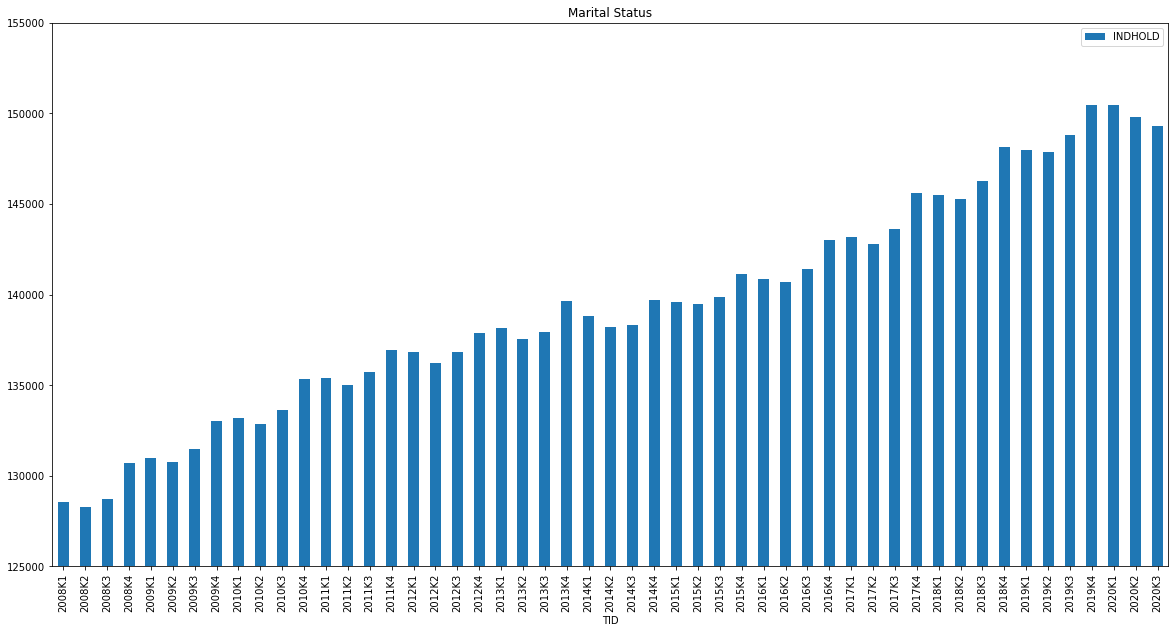

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

marrital_cph_between_2008_now = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=G&OMR%C3%85DE=101&Tid=*', sep=';')

marrital_cph_between_2008_now.plot(kind="bar", title='Marital Status', figsize=(20,10), x='TID', y='INDHOLD')
plt.ylim(125000,155000)
plt.show()

C) Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

(0.0, 108.0)

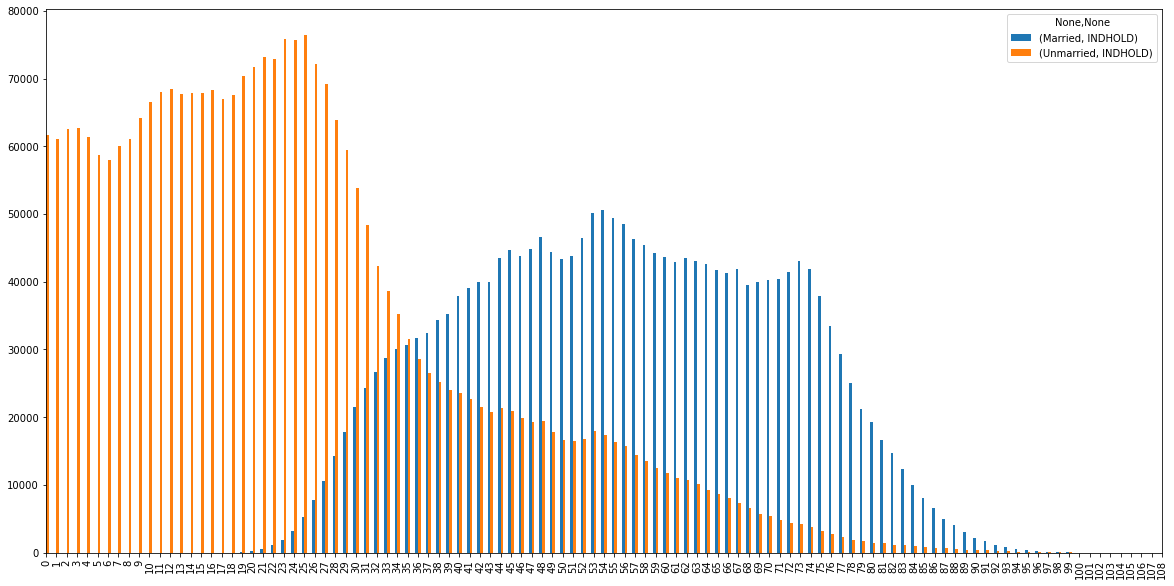

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

married_unmarried_2020 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2020K3&ALDER=*&CIVILSTAND=U%2CG', sep=';')

#married_2020 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2020K3&ALDER=*&CIVILSTAND=G', sep=';')
#unmarried_2020 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2020K3&ALDER=*&CIVILSTAND=U', sep=';')

married_2020_masked = married_unmarried_2020[(married_unmarried_2020[:]['CIVILSTAND'].str.contains('Gift')) & (married_unmarried_2020[:]['ALDER'] != 'I alt')].reset_index(drop=True)
unmarried_2020_mask = married_unmarried_2020[(married_unmarried_2020[:]['CIVILSTAND'].str.contains('Ugift')) & (married_unmarried_2020[:]['ALDER'] != 'I alt')].reset_index(drop=True)

ts = pd.concat([married_2020_masked, unmarried_2020_mask], axis=1, keys=['Married','Unmarried'])
ts.plot(kind="bar", figsize=(20,10))

x_axis_end_year = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2020K3&ALDER=*&CIVILSTAND=U%2CG', sep=';')
x_axis_end_remove_0 = x_axis_end_year[(x_axis_end_year['INDHOLD'] != 0)]
last_age = int(x_axis_end_remove_0.sort_values('INDHOLD', ascending=True).iloc[0,1].replace(' år','')) 

plt.xlim(0,last_age)